In [1]:
import os
os.chdir('/kaggle/input/post-dataset')

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image_train_dataset = np.load('/kaggle/input/post-dataset/np-dataset/image-train-data-file.npy')
mask_train_dataset = np.load('/kaggle/input/post-dataset/np-dataset/mask-train-data-file.npy')
image_test_dataset = np.load('/kaggle/input/post-dataset/np-dataset/image-test-data-file.npy')
mask_test_dataset = np.load('/kaggle/input/post-dataset/np-dataset/mask-test-data-file.npy')

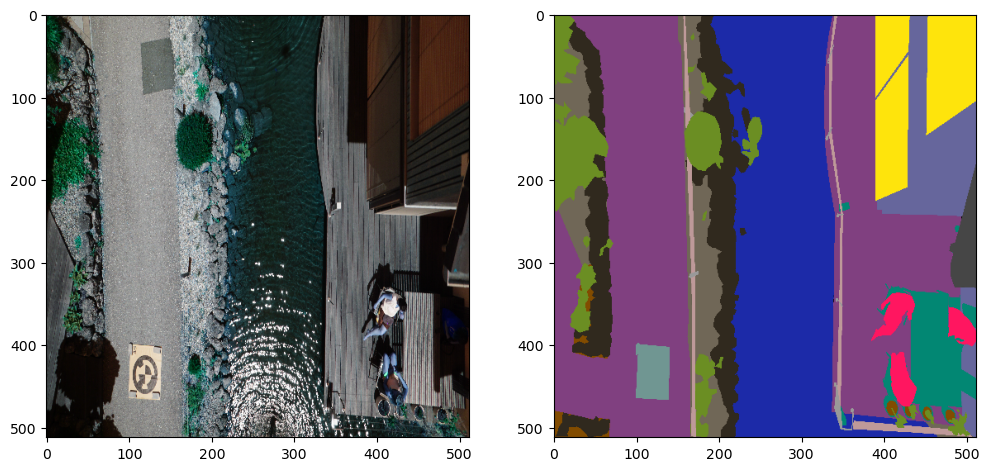

In [4]:
# Checking if train set is done right
import random
image_number = random.randint(0, len(image_train_dataset))
#image_number = 16
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_train_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_train_dataset[image_number])
plt.show()


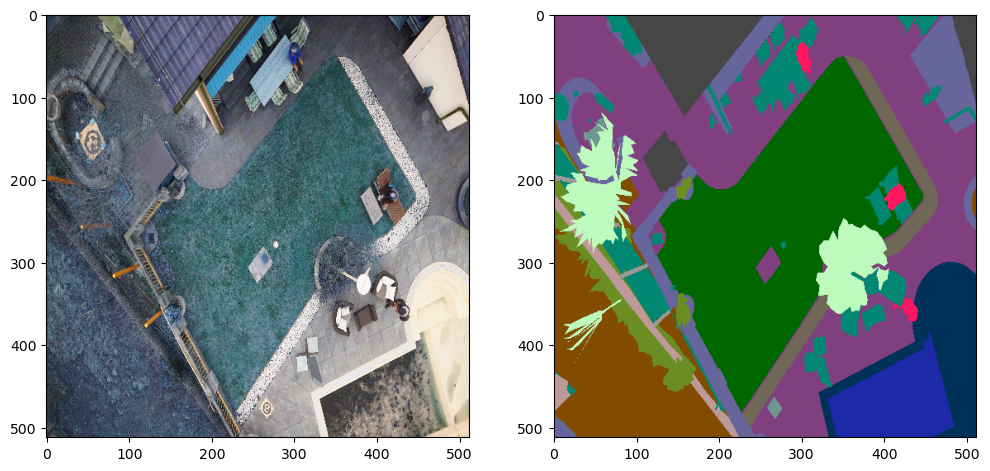

In [5]:
# checking if test set is done right
import random
image_number = random.randint(0, len(image_test_dataset))
#image_number = 16
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_test_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_test_dataset[image_number])
plt.show()

In [6]:
labels_train = np.load('/kaggle/input/post-dataset/np-dataset/labels-train.npy') 
print("Unique labels in label training dataset are: ", np.unique(labels_train))

Unique labels in label training dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [7]:
labels_test = np.load('/kaggle/input/post-dataset/np-dataset/labels-test.npy')  
print("Unique labels in label testing dataset are: ", np.unique(labels_test))

Unique labels in label testing dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


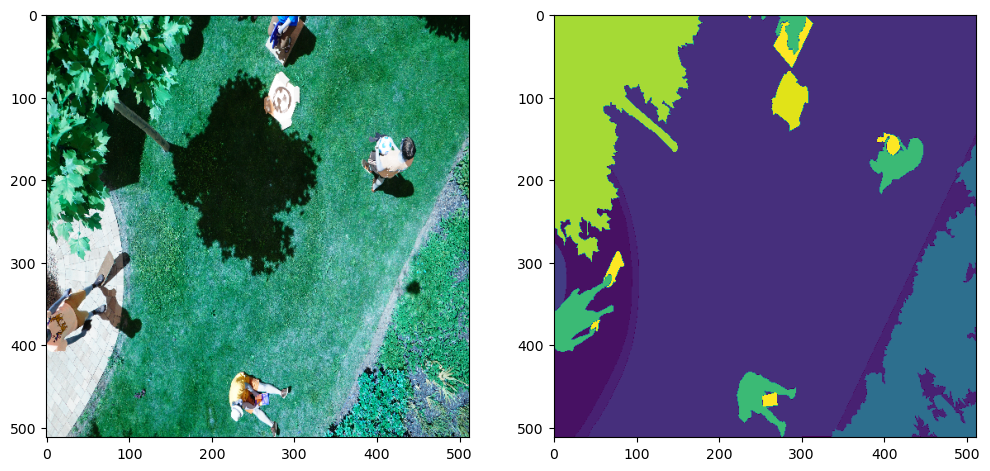

In [8]:
# Checking if integer encoding is done right
import random
import numpy as np
image_number = random.randint(0, len(image_train_dataset))
#image_number = 16
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_train_dataset[image_number])
plt.subplot(122)
plt.imshow(labels_train[image_number][:,:,0])
plt.show()

In [9]:
n_classes = len(np.unique(labels_train))

#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
labels_train_cat = to_categorical(labels_train, num_classes=n_classes)
labels_test_cat = to_categorical(labels_test, num_classes=n_classes)


X_train, X_test, y_train, y_test = image_train_dataset, image_test_dataset, labels_train_cat, labels_test_cat



In [10]:
!pip install pickle5
import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 5.3 MB/s eta 0:00:00


In [11]:
file = open("/kaggle/input/post-dataset/history/trainHistoryDict",'rb')
history1 = pickle.load(file)

In [12]:
type(history1)

dict

In [13]:
history1.keys()

dict_keys(['loss', 'accuracy', 'jacard_coef', 'val_loss', 'val_accuracy', 'val_jacard_coef'])

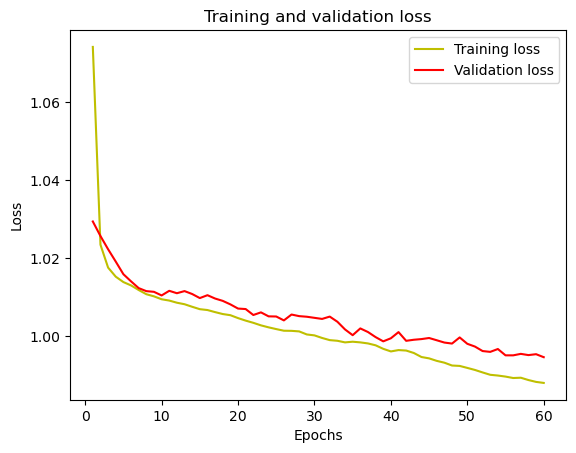

In [14]:
history = history1
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

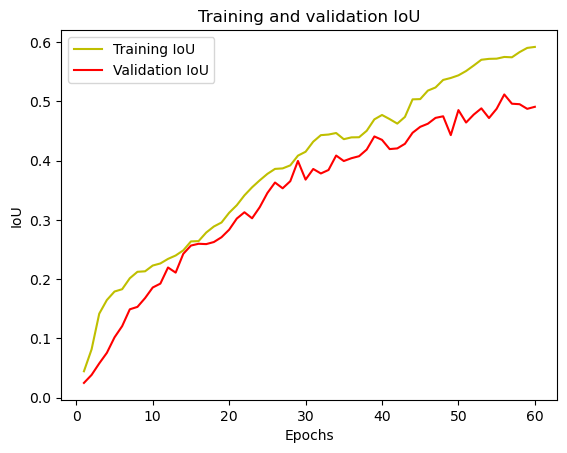

In [15]:
acc = history['jacard_coef']
val_acc = history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

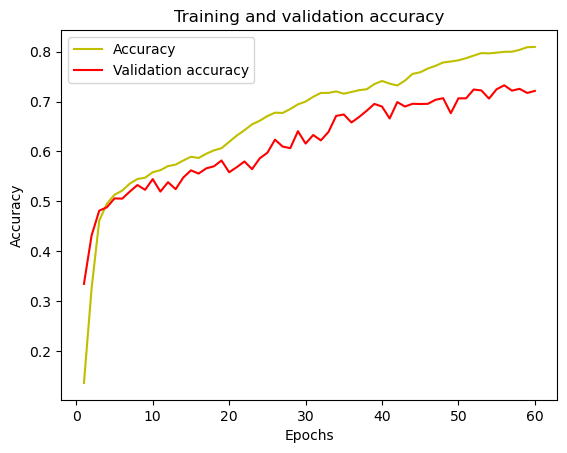

In [16]:
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from keras.models import load_model
model = load_model("/kaggle/input/post-dataset/models/ran60epoch.hdf5",compile=False)

In [18]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

3/3 [==============================] - 20s 6s/step


In [19]:
from keras.metrics import MeanIoU
n_classes = n_classes
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.32854956


1/1 [==============================] - 0s 258ms/step


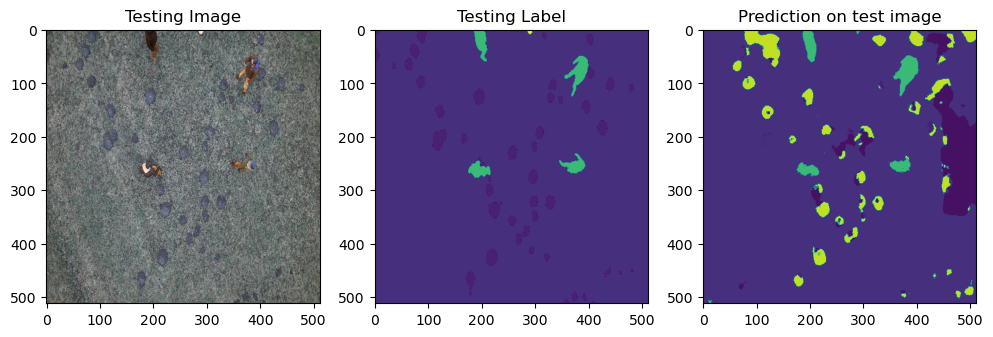

In [20]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()